
PCA:
Components: 1 - NB Accuracy: 0.9733, LR Accuracy: 0.9733
Components: 2 - NB Accuracy: 0.8933, LR Accuracy: 0.9867
Components: 3 - NB Accuracy: 0.9067, LR Accuracy: 0.9733
Components: 4 - NB Accuracy: 0.9200, LR Accuracy: 0.9600

LDA:
Components: 1 - NB Accuracy: 0.9733, LR Accuracy: 0.9733
Components: 2 - NB Accuracy: 0.9467, LR Accuracy: 0.9600

PCA:
Optimal number of components for NB: 1
Optimal number of components for LR: 2

LDA:
Optimal number of components for NB: 1
Optimal number of components for LR: 1


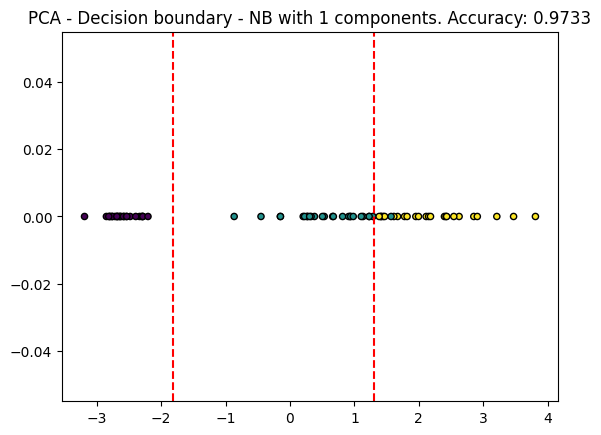

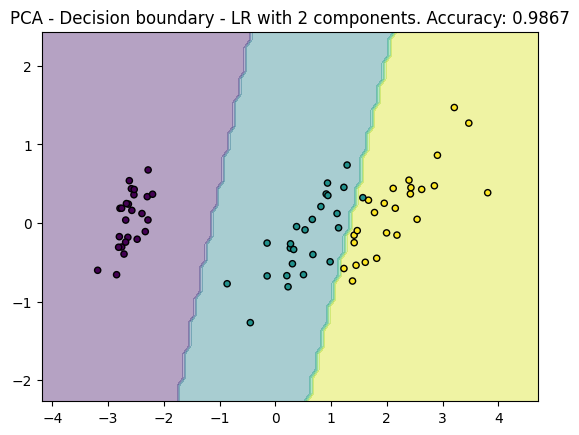

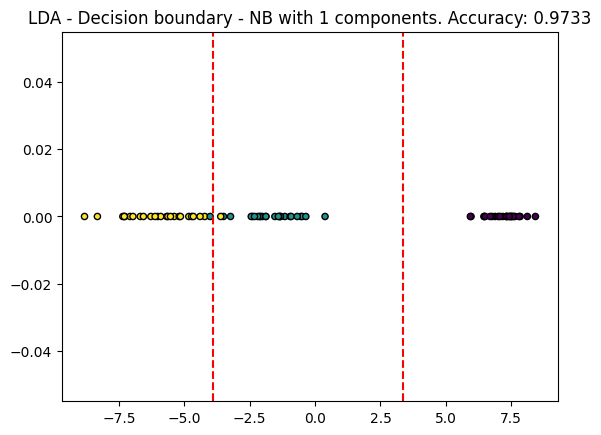

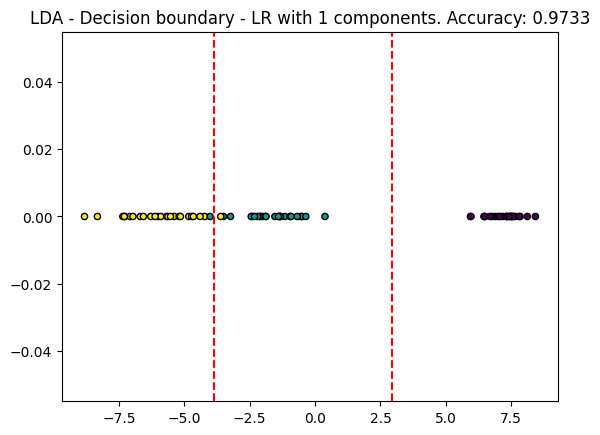

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


def find_optimal_components(NB_accuracies_PCA, LR_accuracies_PCA, NB_accuracies_LDA, LR_accuracies_LDA):
    optimal_pca_nb = np.argmax(NB_accuracies_PCA) + 1
    optimal_pca_lr = np.argmax(LR_accuracies_PCA) + 1

    optimal_lda_nb = np.argmax(NB_accuracies_LDA) + 1
    optimal_lda_lr = np.argmax(LR_accuracies_LDA) + 1

    return (optimal_pca_nb, optimal_pca_lr, optimal_lda_nb, optimal_lda_lr)


def PCA_analysis(X_train, X_test, y_train, y_test):
    print("\nPCA:")
    components = range(1, X_train.shape[1] + 1)
    NB_accuracies = []
    LR_accuracies = []

    for component in components:
        pca = PCA(n_components=component)

        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        NB = GaussianNB()
        LR = LogisticRegression()
        NB.fit(X_train_pca, y_train)
        LR.fit(X_train_pca, y_train)

        nb_predict_y = NB.predict(X_test_pca)
        lr_predict_y = LR.predict(X_test_pca)

        NB_accuracy = accuracy_score(y_test, nb_predict_y)
        LR_accuracy = accuracy_score(y_test, lr_predict_y)
        NB_accuracies.append(NB_accuracy)
        LR_accuracies.append(LR_accuracy)

        print(f"Components: {component} - NB Accuracy: {NB_accuracy:.4f}, LR Accuracy: {LR_accuracy:.4f}")

    return NB_accuracies, LR_accuracies


def LDA_analysis(X_train, X_test, y_train, y_test):
    print("\nLDA:")
    max_components = len(np.unique(y_train)) - 1
    components = range(1, max_components + 1)
    NB_accuracies = []
    LR_accuracies = []

    for component in components:
        lda = LDA(n_components=component)
        X_train_lda = lda.fit_transform(X_train, y_train)
        X_test_lda = lda.transform(X_test)

        NB = GaussianNB()
        LR = LogisticRegression()

        NB.fit(X_train_lda, y_train)
        LR.fit(X_train_lda, y_train)

        nb_predict_y = NB.predict(X_test_lda)
        lr_predict_y = LR.predict(X_test_lda)

        NB_accuracy = accuracy_score(y_test, nb_predict_y)
        LR_accuracy = accuracy_score(y_test, lr_predict_y)

        NB_accuracies.append(NB_accuracy)
        LR_accuracies.append(LR_accuracy)

        print(f"Components: {component} - NB Accuracy: {NB_accuracy:.4f}, LR Accuracy: {LR_accuracy:.4f}")

    return NB_accuracies, LR_accuracies


def plot_decision_boundary_PCA(n_components, model_type, X_train, X_test, y_train, y_test, NB_accuracies_PCA, LR_accuracies_PCA):
    if n_components not in [1, 2]:
        raise ValueError("Number of components must be 1 or 2")

    if n_components == 1:
        reducer = PCA(n_components=1)
    else:
        reducer = PCA(n_components=2)

    X_train_pca = reducer.fit_transform(X_train, y_train)
    X_test_pca = reducer.transform(X_test)

    if model_type == 'NB':
        model = GaussianNB()
    elif model_type == 'LR':
        model = LogisticRegression()

    model.fit(X_train_pca, y_train)

    if n_components == 2:
        x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
        y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, s=20, edgecolor='k')
        plt.title(f'PCA - Decision boundary - {model_type} with {n_components} components. Accuracy: '
                  f'{round(NB_accuracies_PCA[n_components - 1], 4) if model_type == "NB" else round(LR_accuracies_PCA[n_components - 1], 4)}')
        plt.show()
    else:
        plt.scatter(X_test_pca, np.zeros_like(X_test_pca), c=y_test, s=20, edgecolor='k')

        x_values = np.linspace(X_test_pca.min(), X_test_pca.max(), 300)
        predictions = model.predict(x_values.reshape(-1, 1))

        decision_boundary = x_values[np.where(np.diff(predictions) != 0)]
        for i in decision_boundary:
            plt.axvline(x=i, color='red', linestyle='--')

        plt.title(f'PCA - Decision boundary - {model_type} with {n_components} components. Accuracy: '
                  f'{round(NB_accuracies_PCA[n_components - 1], 4) if model_type == "NB" else round(LR_accuracies_PCA[n_components - 1], 4)}')
        plt.show()


def plot_decision_boundary_LDA(n_components, model_type, X_train, X_test, y_train, y_test, NB_accuracies_LDA, LR_accuracies_LDA):
    if n_components not in [1, 2]:
        raise ValueError("Number of components must be 1 or 2")

    if n_components == 1:
        reducer = LDA(n_components=1)
    else:
        reducer = LDA(n_components=2)

    X_train_lda = reducer.fit_transform(X_train, y_train)
    X_test_lda = reducer.transform(X_test)

    if model_type == 'NB':
        model = GaussianNB()
    elif model_type == 'LR':
        model = LogisticRegression()

    model.fit(X_train_lda, y_train)

    if n_components == 2:
        x_min, x_max = X_test_lda[:, 0].min() - 1, X_test_lda[:, 0].max() + 1
        y_min, y_max = X_test_lda[:, 1].min() - 1, X_test_lda[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, s=20, edgecolor='k')
        plt.title(f'LDA - Decision boundary - {model_type} with {n_components} components. Accuracy: '
                  f'{round(NB_accuracies_LDA[n_components - 1], 4) if model_type == "NB" else round(LR_accuracies_LDA[n_components - 1], 4)}')
        plt.show()
    else:
        plt.scatter(X_test_lda, np.zeros_like(X_test_lda), c=y_test, s=20, edgecolor='k')

        x_values = np.linspace(X_test_lda.min(), X_test_lda.max(), 300)
        predictions = model.predict(x_values.reshape(-1, 1))

        decision_boundary = x_values[np.where(np.diff(predictions) != 0)]
        for i in decision_boundary:
            plt.axvline(x=i, color='red', linestyle='--')

        plt.title(f'LDA - Decision boundary - {model_type} with {n_components} components. Accuracy: '
                  f'{round(NB_accuracies_LDA[n_components - 1], 4) if model_type == "NB" else round(LR_accuracies_LDA[n_components - 1], 4)}')
        plt.show()


iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

iris_components = range(1, X.shape[1])

NB_accuracies_PCA, LR_accuracies_PCA = PCA_analysis(X_train, X_test, y_train, y_test)

NB_accuracies_LDA, LR_accuracies_LDA = LDA_analysis(X_train, X_test, y_train, y_test)

optimal_pca_nb, optimal_pca_lr, optimal_lda_nb, optimal_lda_lr = \
    find_optimal_components(NB_accuracies_PCA, LR_accuracies_PCA, NB_accuracies_LDA, LR_accuracies_LDA)

print("\nPCA:")
print(f"Optimal number of components for NB: {optimal_pca_nb}")
print(f"Optimal number of components for LR: {optimal_pca_lr}")

print("\nLDA:")
print(f"Optimal number of components for NB: {optimal_lda_nb}")
print(f"Optimal number of components for LR: {optimal_lda_lr}")

plot_decision_boundary_PCA(optimal_pca_nb, 'NB', X_train, X_test, y_train, y_test, NB_accuracies_PCA, LR_accuracies_PCA)
plot_decision_boundary_PCA(optimal_pca_lr, 'LR', X_train, X_test, y_train, y_test, NB_accuracies_PCA, LR_accuracies_PCA)

plot_decision_boundary_LDA(optimal_lda_nb, 'NB', X_train, X_test, y_train, y_test, NB_accuracies_LDA, LR_accuracies_LDA)
plot_decision_boundary_LDA(optimal_lda_lr, 'LR', X_train, X_test, y_train, y_test, NB_accuracies_LDA, LR_accuracies_LDA)